## ERA 5

<img src="era5_image.png"
     style="float: right; margin-left: 40px;" 
    width="300"/>

ERA5 Reanalysis a 1/4 degree atmospheric reanalysis from ECMWF. It is extremely widely used and basically an "industry standard" go-to when we want to look at wind or radiative forcing over the oceans, etc.  

*ERA5 is the fifth generation ECMWF reanalysis for the global climate and weather for the past 4 to 7 decades. The data assimilation system used to produce ERA5 is the IFS Cycle 41r2 4D-Var.*

*ERA5 reanalysis currently covers the 1979 to present time period and replaces the ERA-Interim reanalysis. The monthly variables are available for 1940-present.* (see below for details about data availability).

### Data availability

ERA5 data are available in several locations:

- The "official" and most comprehensive is the [Copernicus Climate Data Store](https://cds.climate.copernicus.eu/#!/home). However, I donb't think there is a way to do lazy loading from here ([this issue](https://github.com/pangeo-data/pangeo-era5/issues/1) may describe a way to do it).
- ERA5 data seems to be available at the [Asia-Pacific Data Research Center](http://apdrc.soest.hawaii.edu/datadoc/ecmwf_ERA5.php) with opendap access. This is probably the easiest way to do this.
- ERA5 data through Dec 2021 (should be May 23?) is available at [Google Cloud](https://cloud.google.com/storage/docs/public-datasets/era5). Should work very well with xarray.



In [9]:
import xarray as xr
import matplotlib.pyplot as plt
import cmocean

### Load from APDRC

Has a few different products:

- Monthly: Jan 1940 to Mar 2024 by month
- Daily mean: Jan 1979 to Mar 2024 by day
- Hourly: Jan 1979 to Mar 2024 by hour (for LAS6 data are separated into 8 year sections)

For hourly and daily, each variable has an file/opendap URL, e.g. `http:/[..]/hourly/Surface_pressure`, `http://[..]/daily_3d/U_component_of_wind`. For monthly, there is one file for all surface variables: `http://[..]monthly_2d/Surface`.

Browse through [here](http://apdrc.soest.hawaii.edu/dods/public_data/Reanalysis_Data/ERA5) to find the URL of the variable/resolution you want.

In [37]:
url_hourly_2m_temp = ('http://apdrc.soest.hawaii.edu:80/dods/public_data/'
    'Reanalysis_Data/ERA5/hourly/2m_temperature')

In [38]:
# This issues a SerializationWarning - not sure why, but doesn't seem to matter.
ds = xr.open_dataset(url_hourly_2m_temp)

/home/oyvindl/mambaforge/envs/oyv/lib/python3.11/site-packages/xarray/coding/times.py:154: SerializationWarning: Ambiguous reference date string: 1-1-1 00:00:0.0. The first value is assumed to be the year hence will be padded with zeros to remove the ambiguity (the padded reference date string is: 0001-1-1 00:00:0.0). To remove this message, remove the ambiguity by padding your reference date strings with zeros.
  warnings.warn(warning_msg, SerializationWarning)


In [43]:
print('First time stamp in the dataset: ' 
    f'{ds.time[0].dt.strftime("%Y-%m-%d %H:%M").values}')
print('Last time stamp in the dataset: ' 
    f'{ds.time[-1].dt.strftime("%Y-%m-%d %H:%M").values}')

First time stamp in the dataset: 1979-01-01 00:00
Last time stamp in the dataset: 2024-03-31 23:00


### Plot 2m temperature

In [14]:
selected_date = '2020-01-01T13:00'

In [29]:
ds_sel = ds.sel(time = selected_date, method = 'nearest').squeeze()

In [33]:
K_C_offset = 273.15

Text(0.5, 1.0, '2m air temperature on 2020-01-01 12:59')

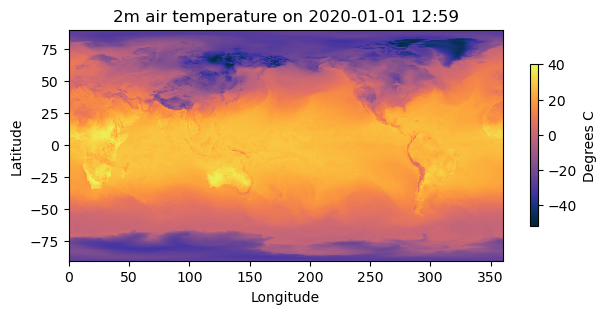

In [46]:
fig, ax = plt.subplots(figsize = (7, 3))
C = ax.pcolormesh(ds_sel.lon, ds_sel.lat, ds_sel.t2 - K_C_offset, 
              cmap = cmocean.cm.thermal)
cb = plt.colorbar(C, label = 'Degrees C', shrink = 0.7)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('2m air temperature on ' 
    f'{ds_sel.time.dt.strftime("%Y-%m-%d %H:%M").values}')

### Load directly from Google Cloud

Load the entire ERA5 dataset (hourly 1959 through 2021). Contains a bunch of variables.

In [5]:
era5 = xr.open_zarr(
    "gs://gcp-public-data-arco-era5/ar/1959-2022-full_37-1h-0p25deg-chunk-1.zarr-v2",
    chunks={'time': 48},
    consolidated=True,
)

In [44]:
print('First time stamp in the dataset: ' 
    f'{era5.time[0].dt.strftime("%Y-%m-%d %H:%M").values}')
print('Last time stamp in the dataset: ' 
    f'{era5.time[-1].dt.strftime("%Y-%m-%d %H:%M").values}')

First time stamp in the dataset: 1959-01-01 00:00
Last time stamp in the dataset: 2021-12-31 23:00
